In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## __1 - Business Problem__  
___Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")___  

## __2 - Data collection and description__ 

In [2]:
df = pd.read_csv("bank-full.csv",sep = ';')

In [3]:
df1 = df.copy()

In [4]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df1.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

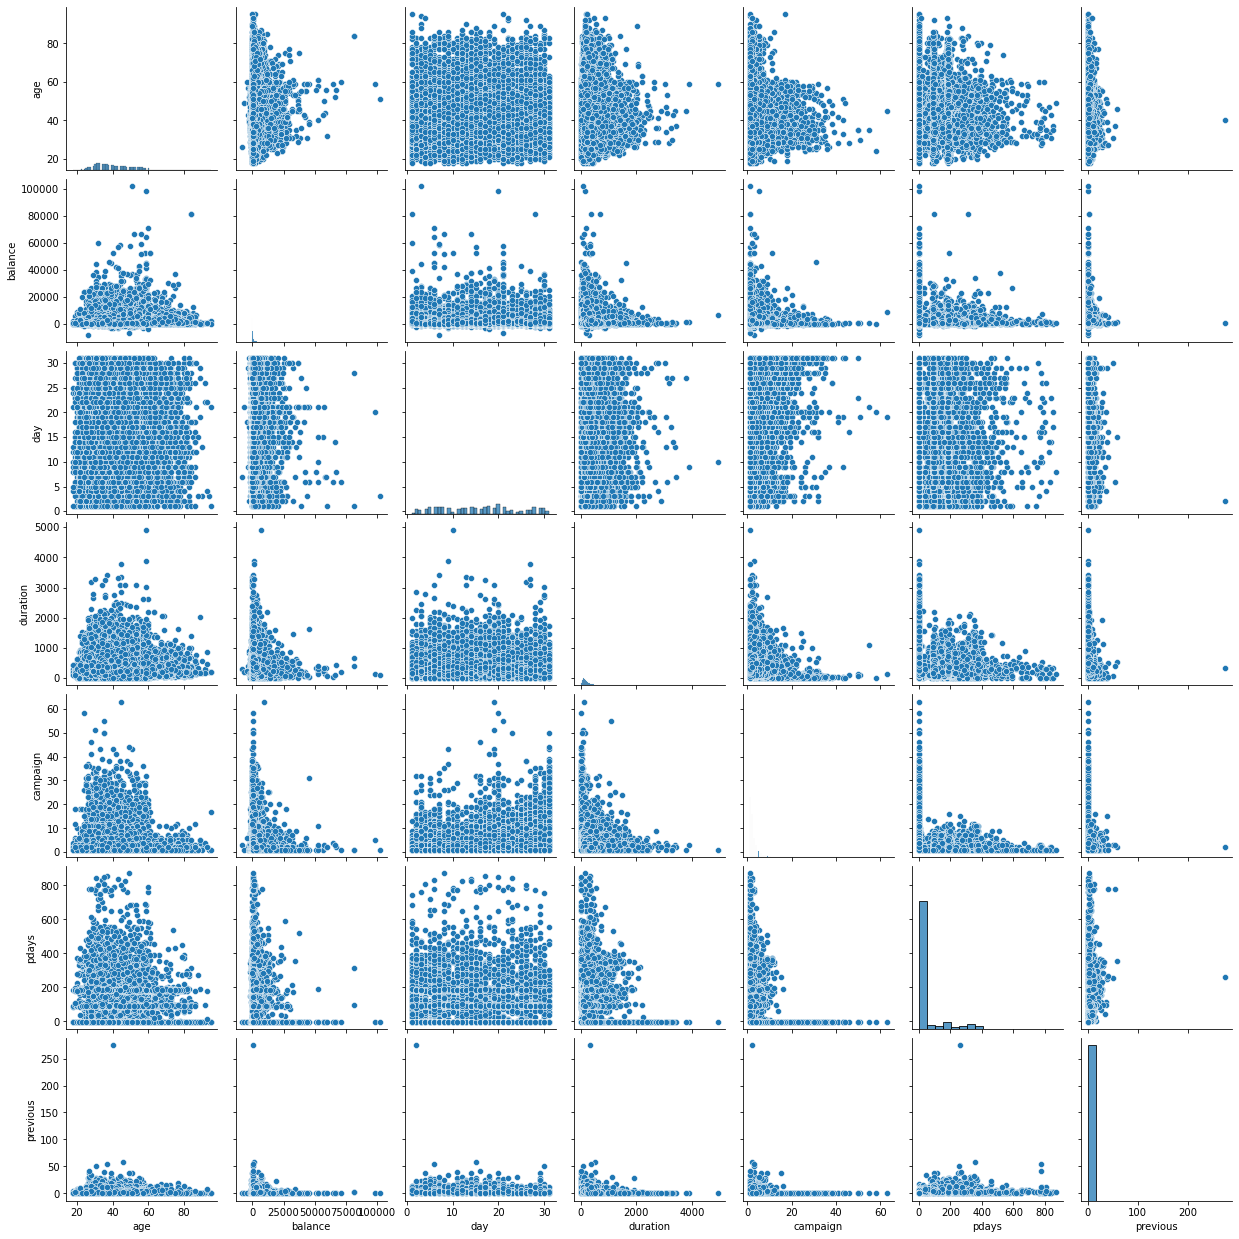

In [6]:
sns.pairplot(df1)

In [7]:
df1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
count_no_sub = len(df1[df1['y']=="no"])
count_sub = len(df1[df1['y']=="yes"])

In [9]:
(count_sub / (count_sub + count_no_sub))*100

11.698480458295547

### Percentage of Client Subscribed is 11.70 % in the current data set

Text(0, 0.5, 'Frequency of subscribtion')

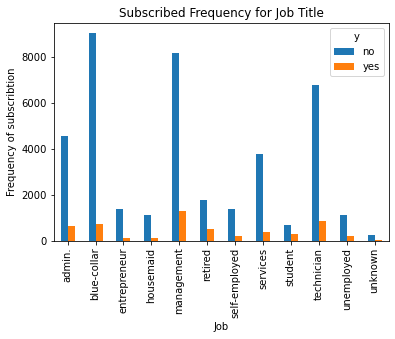

In [10]:
pd.crosstab(df1.job,df1.y).plot(kind='bar')
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')

The frequency of subscribtion depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

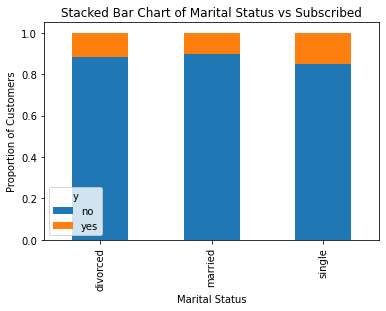

In [11]:
table=pd.crosstab(df1.marital,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

### The marital status seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

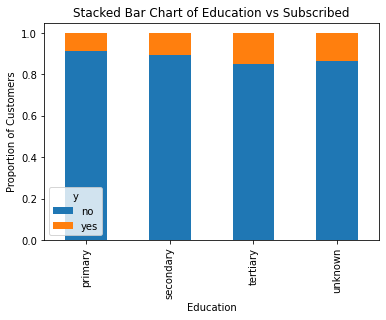

In [12]:
table=pd.crosstab(df1.education,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

### Education seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

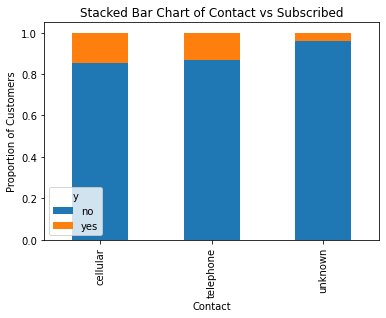

In [13]:
table=pd.crosstab(df1.contact,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact vs Subscribed')
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers')

### Contact does not seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

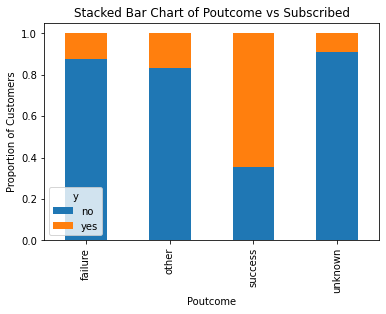

In [14]:
table=pd.crosstab(df1.poutcome,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Poutcome vs Subscribed')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')

### Poutcome does not seem a strong predictor for the outcome variable

Text(0, 0.5, 'Frequency')

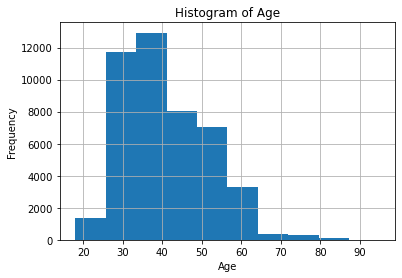

In [15]:
df1.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Most of the customers are in age between 20 and 50 years

Text(0, 0.5, 'Frequency of Subscribed')

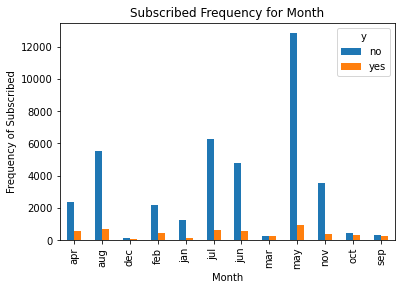

In [16]:
pd.crosstab(df1.month,df1.y).plot(kind='bar')
plt.title('Subscribed Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subscribed')

### Month might be a good predictor of the outcome variabl

Text(0, 0.5, 'Frequency')

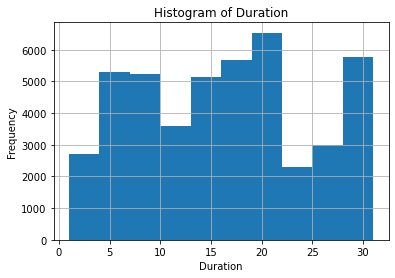

In [17]:
df1.day.hist()
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

In [18]:
df1['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

### Data is somewhat evenly distributed on whether the client has House or not

In [19]:
df1['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

### However majority of the client do not have loan

## __3 - Cleaning Data__ 

In [20]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Since there are no Null values in any column we don't have to create any exceptions

## __4 - Logistic Regression Model__ 

In [21]:
df1 ['default'] = df1 ['default'].map({'yes': 1, 'no': 0})

In [22]:
df1 ['housing'] = df1 ['housing'].map({'yes': 1, 'no': 0})

In [23]:
df1 ['loan'] = df1 ['loan'].map({'yes': 1, 'no': 0})

In [24]:
df1 ['y'] = df1 ['y'].map({'yes': 1, 'no': 0})

In [25]:
df1 = pd.get_dummies(df1, columns=['job'])

In [26]:
df1 = pd.get_dummies(df1, columns=['marital'])

In [27]:
df1 = pd.get_dummies(df1, columns=['education'])

In [28]:
df1 = pd.get_dummies(df1, columns=['month'])

In [29]:
df1 = df1.drop(['contact', 'poutcome'], axis=1)

In [30]:
X = df1.loc[:, df1.columns != 'y']
y = df1.loc[:, df1.columns == 'y']

In [31]:
logreg = LogisticRegression()

In [32]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\vimar\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\vimar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vimar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

[False  True False  True  True False False False False False False False
 False  True False  True False False  True False False False False  True
 False  True False  True False  True  True  True False  True  True  True
  True  True  True  True  True]
[17  1 22  1  1 19 18  8 21  9 16  6  3  1 13  1 11 10  1 12  4  2  7  1
 15  1 14  1 20  1  1  1  5  1  1  1  1  1  1  1  1]


### As per Recursive Feature Elimination (RFE) analysis we can exclude all the variables which are False

In [33]:
X = df1[['default', 'housing', 'loan', 'job_housemaid', 'job_retired', 'job_student', 'marital_married', 'education_primary', 'education_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = df1.loc[:, df1.columns == 'y']

In [34]:
logit=sm.Logit(y,X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.329035
         Iterations 7


In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45191
Method:                           MLE   Df Model:                           19
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                 0.08823
Time:                        01:10:37   Log-Likelihood:                -14876.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default              -0.3787      0.147     -2.583      0.010      -0.666      -0.091
housing              -0.8781      0.032    -27.113      0.000      -0.942      -0.815
loan                 -0.5724      0.052    -11.078      0.000      -0.674      -0.471
job_housemaid        -0.3289      0.107     -3.063      0.002      -0.539      -0.118
job_retired           0.4625      0.060      7.766      0.000       0.346       0.579
job_student           0.3142      0.083      3.793      0.000       0.152       0.477
marital_married      -0.4290      0.030    -14.327      0.000      -0.488      -0.370
education_primary    -0.4093      0.050     -8.128      0.000      -0.508      -0.311
education_unknown    -0.1917      0.076     -2.526      0.012      -0.340      -0.043
month_aug            -1.6473      0.044    -37.054      0.000      -1.734      -1.560
month_dec             0.2455      0.143      1.721      0.085      -0.034       0.525
month_feb            -1.0118      0.056    -18.069      0.000      -1.122      -0.902
month_jan            -1.6548      0.091    -18.198      0.000      -1.833      -1.477
month_jul            -1.4992      0.048    -31.550      0.000      -1.592      -1.406
month_jun            -1.4979      0.050    -30.193      0.000      -1.595      -1.401
month_mar             0.5074      0.097      5.253      0.000       0.318       0.697
month_may            -1.5674      0.044    -35.900      0.000      -1.653      -1.482
month_nov            -1.4004      0.057    -24.622      0.000      -1.512      -1.289
month_oct             0.1817      0.079      2.290      0.022       0.026       0.337
month_sep             0.2701      0.088      3.053      0.002       0.097       0.443
=====================================================================================
"""

#### All variables have significant p value

In [36]:
logreg.fit(X, y)

C:\Users\vimar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [37]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.88


In [38]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     39922
           1       0.49      0.09      0.15      5289

    accuracy                           0.88     45211
   macro avg       0.69      0.54      0.54     45211
weighted avg       0.84      0.88      0.84     45211



In [39]:
confusion_matrix(y, y_pred)

array([[39455,   467],
       [ 4833,   456]], dtype=int64)

## __5 - Output Interpretation__ 

1 - Confusion Matrix  
The result is telling us that we have 39455+456 correct predictions and 4833+467 incorrect predictions.

2 - Accuracy == 84%   
Of the entire data set, 84% of the clients will subcribe